In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs
from sklearn.linear_model import LinearRegression

In [2]:
# Carregando o arquivo:
df = pd.read_csv('weather_data.csv')

# Transformando a coluna 'TS' no formato datetime:
df['TS'] = pd.to_datetime(df['TS'])

# Colocando a variável 'TS' como indice do nosso dataframe:
df.set_index('TS', inplace=True)

# Tratamento de outliers:

# Sabemos que os limites da umidade relativa é de 0% a 100%: 
limite_inferior_RH = 0
limite_superior_RH = 100

outliers_RH = (df['RH'] < limite_inferior_RH) | (df['RH'] > limite_superior_RH)

# Agora vamos tratar os outliers da temperatura ambiente. 
# O aceitável é uma temperatura ambiente entre 20°C e um pouco mais de 30°C.
IQR_TAMB = df['TAMB'].quantile(0.75) - df['TAMB'].quantile(0.25)
limite_inferior_TAMB = df['TAMB'].quantile(0.05) # 95% dos dados estão acima desse quartil 
limite_superior_TAMB = df['TAMB'].quantile(0.75) + (1.5 * IQR_TAMB)
outliers_TAMB = (df['TAMB'] <= limite_inferior_TAMB) | (df['TAMB'] >= limite_superior_TAMB)
limite_inferior_TAMB, limite_superior_TAMB

# Dataframe flitrado:
outliers = (outliers_RH | outliers_TAMB)
df_limpo = df[~outliers]
df_limpo

# Criando uma variável para os registros mensais:
df_mensal = df_limpo.copy()
df_mensal = df_mensal.resample('M').mean()

# Criando uma variável para os registros diarios:
df_diario = df_limpo.copy()
df_diario = df_diario.resample('D').mean()

# Substituindo os valores NaN do df_diario:
df_diario = df_diario.apply(lambda col: col.fillna(col.mean()), axis=0)

/tmp/ipykernel_10739/3686742295.py:33: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_mensal = df_mensal.resample('M').mean()


In [14]:
IQR_GHI = df['GHI'].quantile(0.75) - df['GHI'].quantile(0.25)
limite_inferior_GHI = 0 
limite_superior_GHI = df['GHI'].quantile(0.75) + (1.5 * IQR_GHI)
outliers_GHI = (df['GHI'] <= limite_inferior_GHI) | (df['GHI'] >= limite_superior_GHI)
limite_inferior_GHI, limite_superior_GHI

(0, 1082.0)

In [15]:
df_abril = df_diario[df_diario.index.month == 4]
df_abril

,RH,TAMB,GHI
TS,,,
2024-04-10,89.567144,26.355476,159.156764
2024-04-11,89.512089,26.349825,163.468903
2024-04-12,88.047847,26.706389,240.848264
2024-04-13,90.931579,26.293985,178.477026
2024-04-14,76.634982,26.310754,243.072086
2024-04-15,76.634982,26.310754,243.072086
2024-04-16,76.634982,26.310754,243.072086
2024-04-17,76.634982,26.310754,243.072086
2024-04-18,76.634982,26.310754,243.072086


/tmp/ipykernel_10739/2818051425.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_mensal.index.strftime('%b-%Y'), rotation=45)


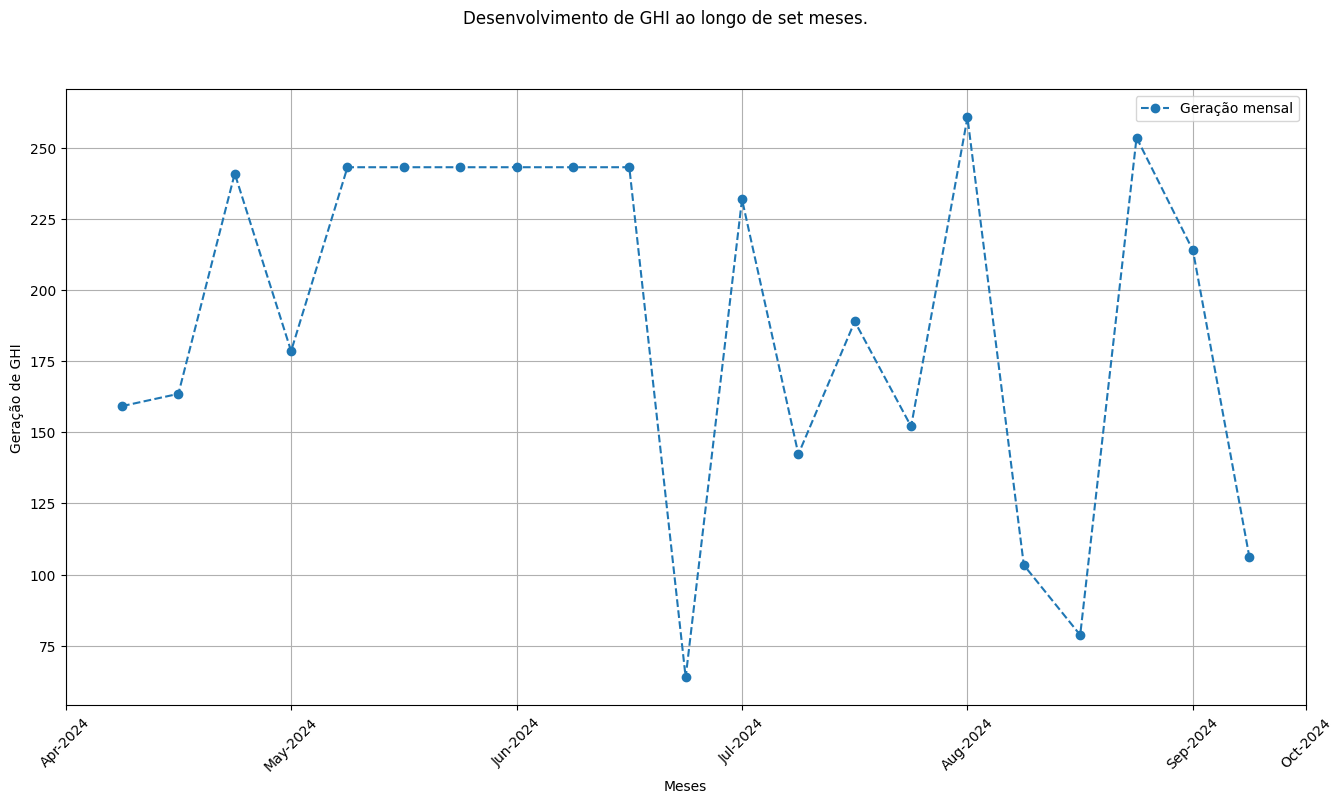

In [17]:
fig, ax = plt.subplots(figsize=(16,8))
plt.suptitle('Desenvolvimento de GHI ao longo de set meses.')
ax.plot(df_abril['GHI'], label='Geração mensal', marker='o', linestyle='--')
ax.set_xlabel('Meses')
ax.set_ylabel('Geração de GHI')
ax.set_xticklabels(df_mensal.index.strftime('%b-%Y'), rotation=45)  
ax.legend()
plt.grid(True)
plt.show()

In [8]:
matriz_de_correlacao = df_limpo.corr()

In [10]:
matriz_de_correlacao

,RH,TAMB,GHI
RH,1.000000,-0.885308,-0.805580
TAMB,-0.885308,1.000000,0.842909
GHI,-0.805580,0.842909,1.000000


In [6]:
import seaborn as sns

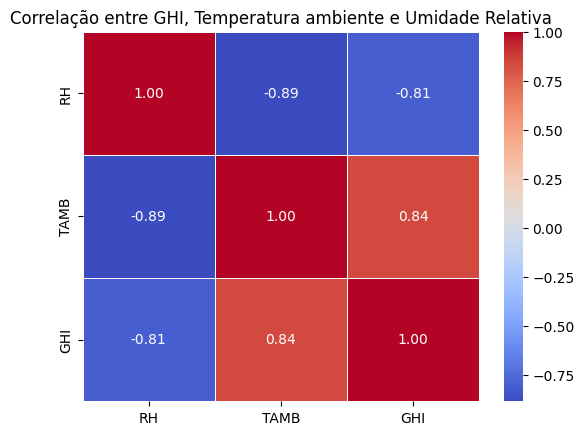

In [12]:
sns.heatmap(matriz_de_correlacao, annot=True, cmap="coolwarm", fmt=".2f",linewidths=0.5)
plt.title('Correlação entre GHI, Temperatura ambiente e Umidade Relativa')
plt.show()